https://www.kaggle.com/code/collllin/beginner-superhero-eda

# Data Preparation

### Importing Modules and Loading Data

In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


powers = pd.read_csv('./input/super_hero_powers.csv')
powers.dataframeName = 'super_hero_powers.csv'

heroes = pd.read_csv('./input/heroes_information.csv')
heroes.dataframeName = 'heroes_information.csv'

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
#!pip install missingno
#import missingno as msno

### Inspecting the Data

In [6]:
heroes.head(3)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


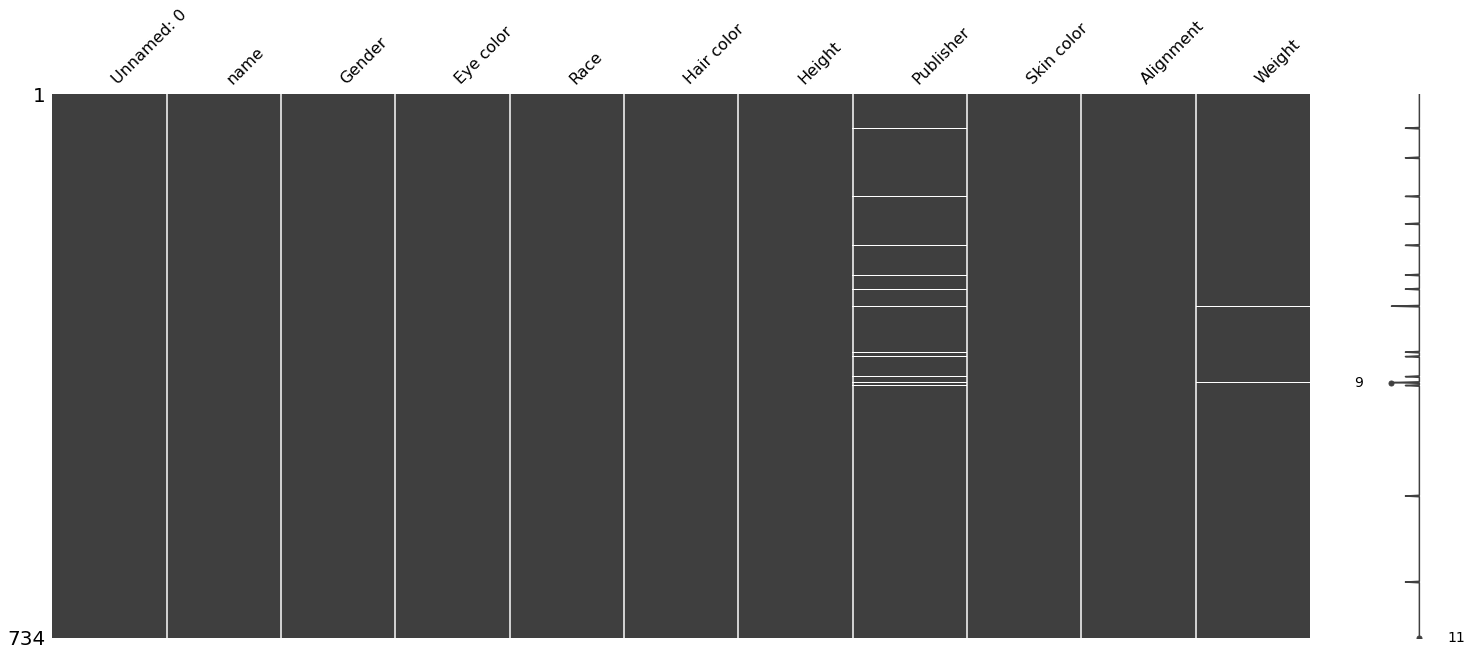

In [7]:
msno.matrix(heroes)
plt.show()

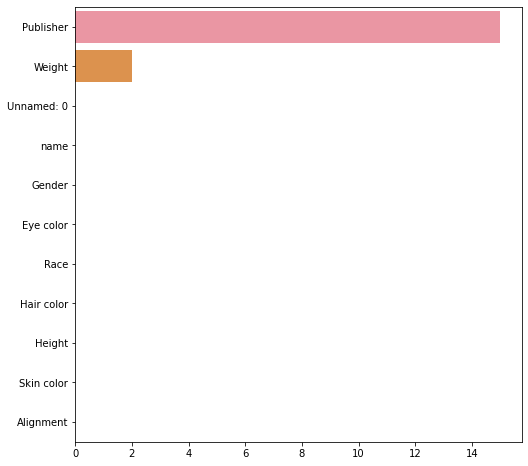

In [8]:
missing_data = heroes.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(y=missing_data.index.values, x=missing_data.values, order=missing_data.index)
plt.show()

In [9]:
#plotPerColumnDistribution(heroes, 10, 5)
#plotPerColumnDistribution(powers, 10, 5)

In [10]:
#plotCorrelationMatrix(heroes, 8)

In [11]:
#plotScatterMatrix(heroes, 6, 15)

In [12]:
powers.head(3)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


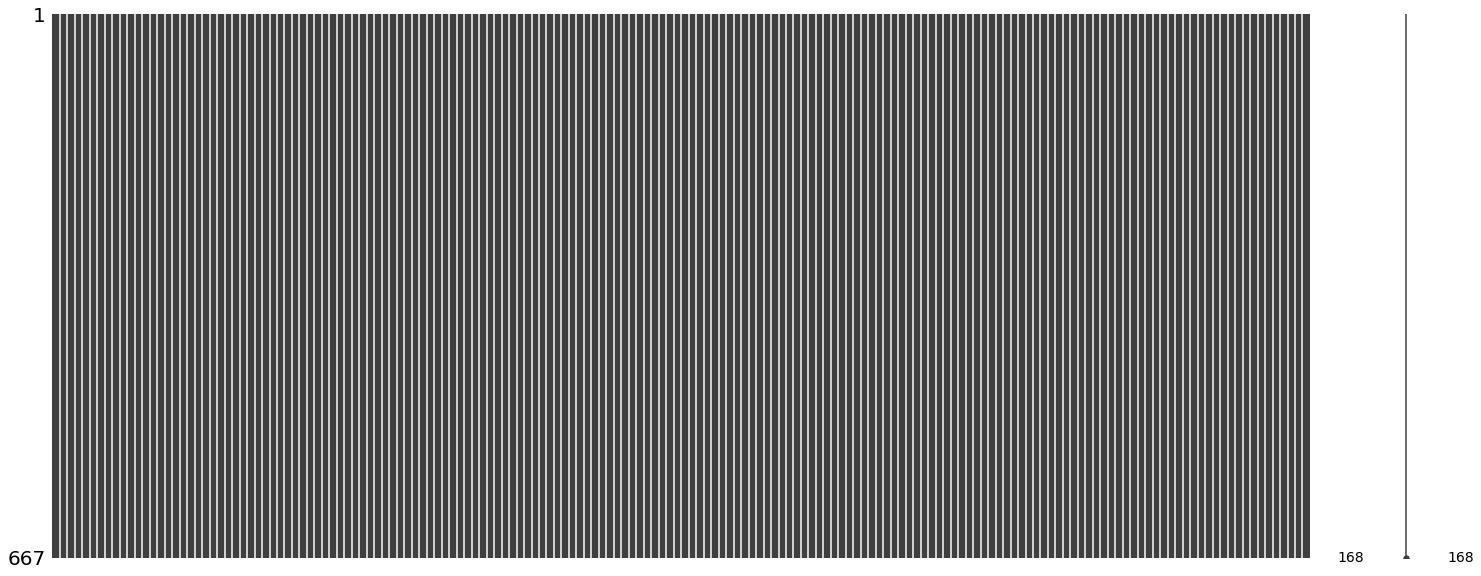

In [13]:
msno.matrix(powers)
plt.show()

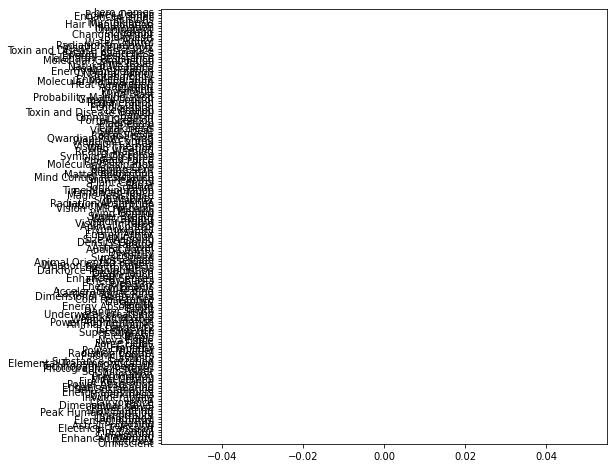

In [14]:
missing_data = powers.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(y=missing_data.index.values, x=missing_data.values, order=missing_data.index)
plt.show()

In [15]:
# apaguei a coluna 'Unnamed: 0' porque era um índice adicional.
heroes= heroes.drop('Unnamed: 0', axis=1)
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [16]:
heroes['Alignment'].unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [17]:
heroes['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [18]:
##  Renomeei valores na coluna 'Editora' para outros, 
## se não fossem Marvel Comics nem DC Comics. 
##  Presumi que não haveria muitos heróis dessas outras editoras. 
##  Alguns deles não são os principais concorrentes na indústria de quadrinhos. 
##  Um exemplo seria South Park. É um desenho animado que eu assisto.

heroes.loc[(heroes['Publisher'] != 'Marvel Comics') & (heroes['Publisher'] != 'DC Comics'),'Publisher'] = 'Other'

heroes['Publisher'].unique()

array(['Marvel Comics', 'Other', 'DC Comics'], dtype=object)

In [19]:
heroes['name'].unique()

array(['A-Bomb', 'Abe Sapien', 'Abin Sur', 'Abomination', 'Abraxas',
       'Absorbing Man', 'Adam Monroe', 'Adam Strange', 'Agent 13',
       'Agent Bob', 'Agent Zero', 'Air-Walker', 'Ajax', 'Alan Scott',
       'Alex Mercer', 'Alex Woolsly', 'Alfred Pennyworth', 'Alien',
       'Allan Quatermain', 'Amazo', 'Ammo', 'Ando Masahashi', 'Angel',
       'Angel Dust', 'Angel Salvadore', 'Angela', 'Animal Man',
       'Annihilus', 'Ant-Man', 'Ant-Man II', 'Anti-Monitor', 'Anti-Spawn',
       'Anti-Venom', 'Apocalypse', 'Aquababy', 'Aqualad', 'Aquaman',
       'Arachne', 'Archangel', 'Arclight', 'Ardina', 'Ares', 'Ariel',
       'Armor', 'Arsenal', 'Astro Boy', 'Atlas', 'Atom', 'Atom Girl',
       'Atom II', 'Atom III', 'Atom IV', 'Aurora', 'Azazel', 'Azrael',
       'Aztar', 'Bane', 'Banshee', 'Bantam', 'Batgirl', 'Batgirl III',
       'Batgirl IV', 'Batgirl V', 'Batgirl VI', 'Batman', 'Batman II',
       'Battlestar', 'Batwoman V', 'Beak', 'Beast', 'Beast Boy', 'Beetle',
       'Ben 10', 'B

In [20]:
heroes['name'].isna().value_counts()

False    734
Name: name, dtype: int64

In [21]:
heroes.loc[heroes['name'] == '-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [22]:
heroes['Gender'].unique()

array(['Male', 'Female', '-'], dtype=object)

In [23]:
heroes.loc[heroes['Gender']=='-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0
134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0
178,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0
204,Darkside,-,-,-,-,-99.0,Other,-,bad,-99.0
234,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0


In [24]:
heroes['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'violet', 'white',
       'purple', 'black', 'grey', 'silver', 'yellow / red',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

In [25]:
heroes['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Kaiju', 'Saiyan', 'Gorilla',
       'Rodian', 'Flora Colossus', 'Human-Vuldarian', 'Asgardian',
       'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian', 'Animal',
       'Czarnian', 'Martian', 'Spartoi', 'Planet', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Human-Vulcan', 'Human-Spartoi', 'Tamaranean',
       'Frost Giant', 'Mutant / Clone', "Yoda's species"], dtype=object)

In [26]:
heroes['Skin color'].unique()

array(['-', 'blue', 'red', 'black', 'grey', 'gold', 'green', 'white',
       'pink', 'silver', 'red / black', 'yellow', 'purple',
       'orange / white', 'gray', 'blue-white', 'orange'], dtype=object)

In [27]:
heroes['Skin color'].isnull().value_counts()

False    734
Name: Skin color, dtype: int64

In [28]:
heroes['Height'].value_counts()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 211.0      5
 157.0      5
 203.0      5
 244.0      4
 155.0      3
 226.0      3
 229.0      3
 218.0      3
 30.5       2
 122.0      2
 279.0      2
 137.0      2
 305.0      2
 206.0      2
 366.0      2
 234.0      1
 304.8      1
 160.0      1
 140.0      1
 15.2       1
 297.0      1
 64.0       1
 71.0       1
 287.0      1
 257.0      1
 79.0       1
 259.0      1
 701.0      1
 108.0      1
 62.5       1
 876.0      1
 142.0      1
 975.0      1
 267.0      1
 61.0       1
 66.0       1
Name: Height, dtype: int64

In [29]:
heroes['Weight'].value_counts()

-99.0     237
 54.0      23
 79.0      23
 81.0      22
 90.0      19
         ... 
 119.0      1
 48.0       1
 4.0        1
 115.0      1
 17.0       1
Name: Weight, Length: 135, dtype: int64

In [30]:
heroes['Hair color'].unique()

array(['No Hair', 'Black', 'Blond', 'Brown', '-', 'White', 'Purple',
       'Orange', 'Pink', 'Red', 'Auburn', 'Strawberry Blond', 'black',
       'Blue', 'Green', 'Magenta', 'Brown / Black', 'Brown / White',
       'blond', 'Silver', 'Red / Grey', 'Grey', 'Orange / White',
       'Yellow', 'Brownn', 'Gold', 'Red / Orange', 'Indigo',
       'Red / White', 'Black / Blue'], dtype=object)

In [31]:
heroes.loc[heroes['Gender'] == '-','Gender'] = 'Unknown'
heroes.loc[heroes['Eye color'] == '-','Eye color'] = 'Unknown'
heroes.loc[heroes['Hair color'] == '-','Hair color'] = 'Unknown'
heroes.loc[heroes['Hair color'] == 'Brownn','Hair color'] = 'Brown'
heroes.loc[heroes['Hair color'] == 'black','Hair color'] = 'Black'
heroes.loc[heroes['Skin color'] == '-','Skin color'] = 'Unknown'
heroes.loc[heroes['Alignment'] == '-','Alignment'] = 'Unknown'
heroes.loc[heroes['Race'] == '-','Race'] = 'Unknown'
heroes.loc[(heroes['Publisher'] == '-') | (heroes['Publisher'].isna() == True),'Publisher'] = 'Unknown'
heroes.loc[heroes['Height'] < 0,'Height'] = 'Unknown'
heroes.loc[heroes['Weight'] < 0,'Weight'] = 'Unknown'

In [32]:
heroes = heroes.rename(columns={'name': 'hero_names'})

In [33]:
heroes.loc[heroes['Gender'] == 'Unknown']

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,Unknown,Unknown,Unknown,Unknown,Unknown,Marvel Comics,Unknown,good,Unknown
112,Blaquesmith,Unknown,black,Unknown,No Hair,Unknown,Marvel Comics,Unknown,good,Unknown
133,Box III,Unknown,blue,Unknown,Blond,193.0,Marvel Comics,Unknown,good,110.0
134,Box IV,Unknown,brown,Unknown,Brown / Black,Unknown,Marvel Comics,Unknown,good,Unknown
160,Captain Universe,Unknown,Unknown,God / Eternal,Unknown,Unknown,Marvel Comics,Unknown,good,Unknown
165,Cecilia Reyes,Unknown,brown,Unknown,Brown,170.0,Marvel Comics,Unknown,good,62.0
178,Clea,Unknown,Unknown,Unknown,White,Unknown,Marvel Comics,Unknown,good,Unknown
196,Cypher,Unknown,blue,Unknown,Blond,175.0,Marvel Comics,Unknown,good,68.0
204,Darkside,Unknown,Unknown,Unknown,Unknown,Unknown,Other,Unknown,bad,Unknown
234,Ego,Unknown,Unknown,Unknown,Unknown,Unknown,Marvel Comics,Unknown,bad,Unknown


In [34]:
combined = pd.merge(heroes,powers)

In [35]:
combined.head(3)

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Other,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False


## Data Visualizations

In [36]:
sns.set_palette("pastel")

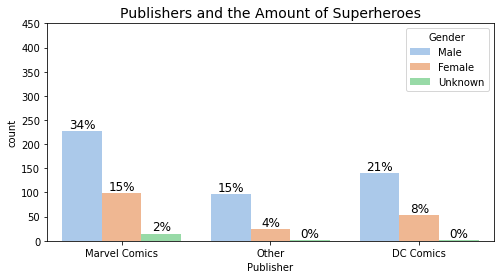

In [37]:
Publisher_df=combined[['Publisher','Gender']]
plt.figure(figsize=(8,4))
sns.countplot(x='Publisher',data=Publisher_df,hue='Gender')
plt.title('Publishers and the Amount of Superheroes', fontsize=14)

def roundup(x):
    return 50 + int(math.ceil(x / 100.0)) * 100 

total =float(len(Publisher_df))
ax = plt.gca()
y_max = combined['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


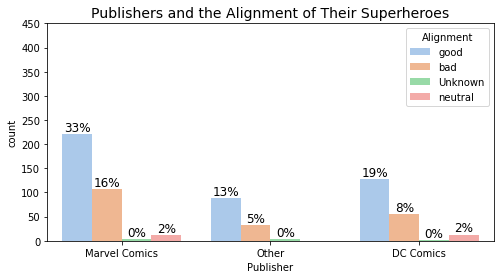

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x='Publisher',data=combined,hue='Alignment')
total =float(len(combined))
plt.title('Publishers and the Alignment of Their Superheroes', fontsize=14)


ax = plt.gca()
y_max = combined['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

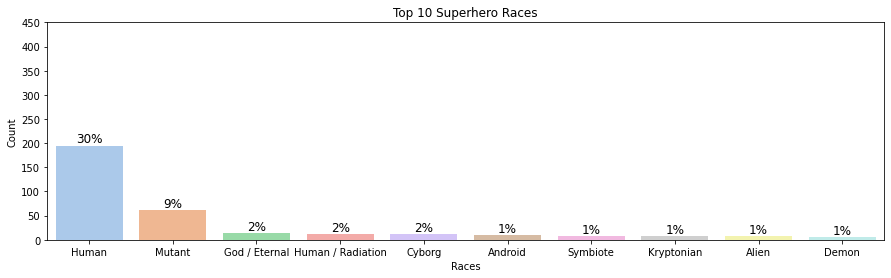

In [39]:
df = combined.drop(combined[combined.Race == 'Unknown'].index) # Keep


Race_df = df['Race'].value_counts().sort_values(ascending=False).head(10)

label = Race_df.index
value = Race_df.values

plt.figure(figsize=(15,4))
sns.barplot(x=label,y=value)
plt.xlabel('Races')
plt.ylabel('Count')
plt.title("Top 10 Superhero Races")

ax = plt.gca()
y_max = combined['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()


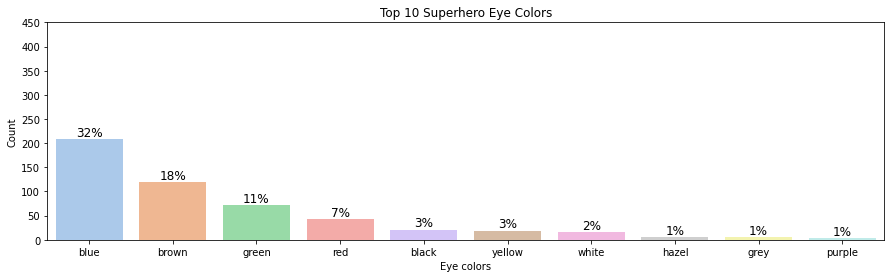

In [40]:
df = combined.drop(combined[combined['Eye color'] == 'Unknown'].index) 
Eyecolor_df = df['Eye color'].value_counts().sort_values(ascending=False).head(10)

label = Eyecolor_df.index
value = Eyecolor_df.values

plt.figure(figsize=(15,4))
sns.barplot(x=label,y=value)
plt.xlabel('Eye colors')
plt.ylabel('Count')
plt.title("Top 10 Superhero Eye Colors")

ax = plt.gca()
y_max = combined['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [41]:
df = combined.drop(combined.columns[10:],axis=1)
df['Height'].unique()

array([203.0, 191.0, 185.0, 'Unknown', 193.0, 178.0, 188.0, 180.0, 244.0,
       257.0, 183.0, 165.0, 163.0, 211.0, 61.0, 229.0, 213.0, 175.0,
       173.0, 198.0, 168.0, 170.0, 201.0, 218.0, 30.5, 196.0, 157.0,
       226.0, 267.0, 122.0, 975.0, 142.0, 876.0, 62.5, 108.0, 701.0,
       259.0, 155.0, 71.0, 287.0, 234.0, 64.0, 366.0, 206.0, 305.0, 297.0,
       137.0, 279.0, 15.2, 160.0, 304.8, 66.0], dtype=object)

In [42]:
Height_df=df.drop(df[df['Height']=='Unknown'].index)

Height_M=Height_df.drop(Height_df[Height_df['Gender']!= 'Male'].index)
Height_F=Height_df.drop(Height_df[Height_df['Gender']!= 'Female'].index)
Height_U=Height_df.drop(Height_df[Height_df['Gender']!= 'Unknown'].index)


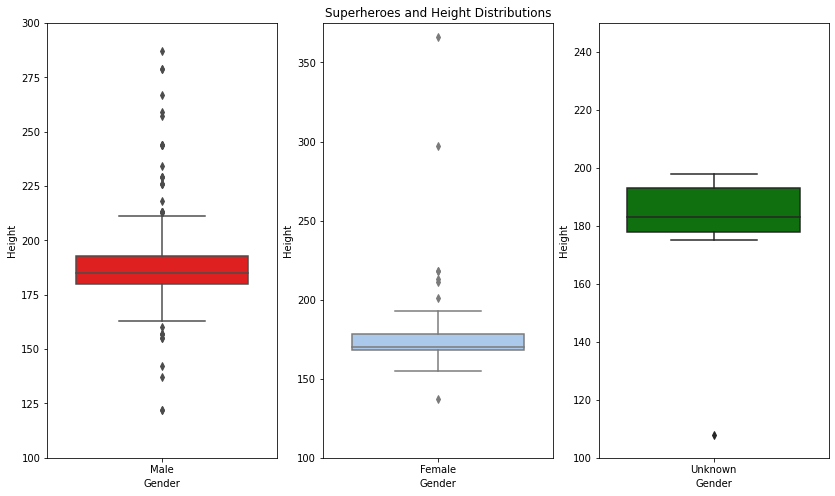

In [43]:
fig=plt.figure(figsize=(14,8))
fig.add_subplot(1,3,1)
plt.ylim(100,300)
sns.boxplot(x='Gender',y='Height',data=Height_M, width =0.75, color='red')
fig.add_subplot(1,3,2)
plt.ylim(100,375)
plt.title('Superheroes and Height Distributions')
sns.boxplot(x='Gender',y='Height',data=Height_F, width =0.75)
fig.add_subplot(1,3,3)
plt.ylim(100,250)
sns.boxplot(x='Gender',y='Height',data=Height_U, width =0.75, color ='green')
plt.show()

In [44]:
Weight_df=df.drop(df[df['Weight']=='Unknown'].index)
Weight_df=Weight_df.dropna()

Weight_M=Weight_df.drop(Weight_df[Weight_df['Gender']!= 'Male'].index)
Weight_F=Weight_df.drop(Weight_df[Weight_df['Gender']!= 'Female'].index)
Weight_U=Weight_df.drop(Weight_df[Weight_df['Gender']!= 'Unknown'].index)

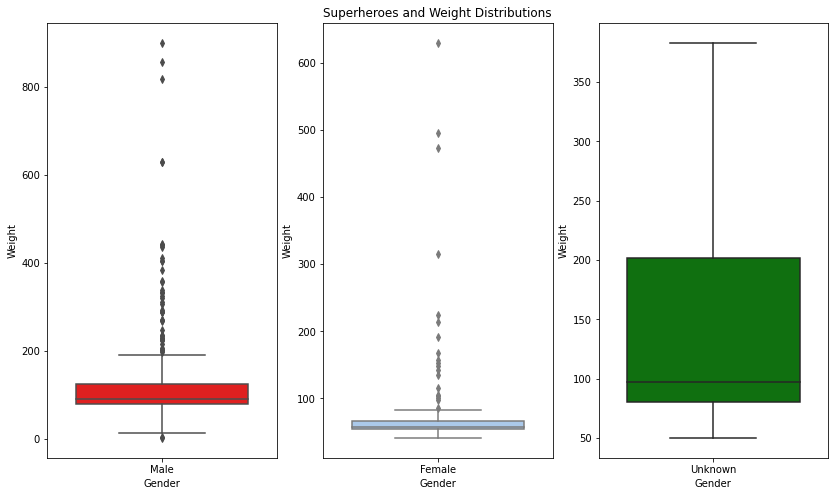

In [45]:
fig=plt.figure(figsize=(14,8))
fig.add_subplot(1,3,1)

sns.boxplot(x='Gender',y='Weight',data=Weight_M, width =0.75,color='red')
fig.add_subplot(1,3,2)

plt.title('Superheroes and Weight Distributions')
sns.boxplot(x='Gender',y='Weight',data=Weight_F, width =0.75)
fig.add_subplot(1,3,3)

sns.boxplot(x='Gender',y='Weight',data=Weight_U, width =0.75, color='green')
plt.show()

In [46]:
hero_powers=combined*1
hero_powers.loc[:, '# of powers'] = hero_powers.iloc[:, 1:].sum(axis=1)
hero_powers

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,# of powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,...,0,0,0,0,0,0,0,0,0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Other,blue,good,65.0,...,0,0,0,0,0,0,0,0,0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0,0,0,0,0,0,0,0,0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,...,0,0,0,0,0,0,0,0,0,8
4,Abraxas,Male,blue,Cosmic Entity,Black,Unknown,Marvel Comics,Unknown,bad,Unknown,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0,...,0,0,0,0,0,0,0,0,0,3
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,Unknown,...,0,0,0,0,0,0,0,0,0,6
657,Yoda,Male,brown,Yoda's species,White,66.0,Other,green,good,17.0,...,0,0,0,0,0,0,0,0,0,19
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0,...,0,0,0,0,0,0,0,0,0,8


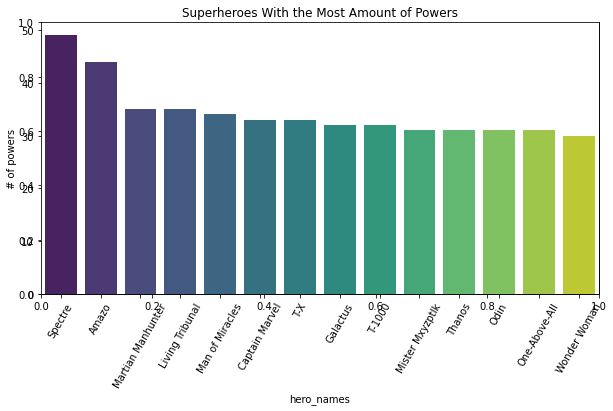

In [47]:
df=hero_powers[['hero_names','# of powers']].sort_values('# of powers',ascending=False)
fig=plt.figure(figsize=(10,5))
plt.title('Superheroes With the Most Amount of Powers')
fig.add_subplot(1,1,1)
sns.barplot(x='hero_names',y='# of powers',data=df.head(15),palette="viridis")
plt.xticks(rotation=60)


plt.show()

In [48]:
df

,hero_names,# of powers
555,Spectre,49
17,Amazo,44
388,Martian Manhunter,35
366,Living Tribunal,35
382,Man of Miracles,34
...,...,...
540,Silk Spectre II,1
539,Silk Spectre,1
323,JJ Powell,1
338,Kathryn Janeway,1


In [49]:
hp=hero_powers[['hero_names','# of powers','Gender']].sort_values('# of powers',ascending=False)
hp_M=hp.drop(hp[hp['Gender'] != 'Male'].index)
hp_U=hp.drop(hp[hp['Gender'] != 'Unknown'].index)
hp_F=hp.drop(hp[hp['Gender'] != 'Female'].index)

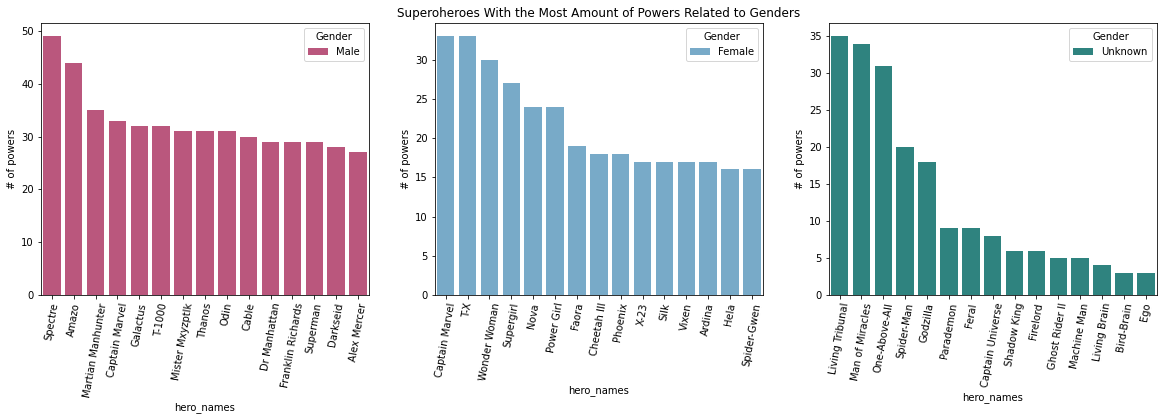

In [50]:
fig=plt.figure(figsize=(20,5))
fig.add_subplot(1,3,1)
sns.barplot(x='hero_names',y='# of powers',data=hp_M.head(15),palette="plasma_r",hue='Gender')
plt.xticks(rotation=80)

fig.add_subplot(1,3,2)
plt.title("Superoheroes With the Most Amount of Powers Related to Genders")
sns.barplot(x='hero_names',y='# of powers',data=hp_F.head(15),palette="Blues",hue='Gender')
plt.xticks(rotation=80)

fig.add_subplot(1,3,3)
sns.barplot(x='hero_names',y='# of powers',data=hp_U.head(15),palette="viridis",hue='Gender')
plt.xticks(rotation=80)
plt.show()

In [51]:
hero_powers=hero_powers.drop(hero_powers.columns[0:10],axis=1)
hero_powers

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,# of powers
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
656,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
657,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,19
658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [52]:
hero_powers=hero_powers.drop('# of powers', axis =1)

hero_powers_count =pd.DataFrame()

for i in hero_powers.columns:
    hero_powers_count[i] = hero_powers[i].value_counts()

C:\Users\F8050751\OneDrive - TIM\python_projects\github\superhero\venv\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [53]:
hero_powers_count
hero_powers_count=hero_powers_count.drop([0])
hero_powers_count=hero_powers_count.T
hero_powers_count=hero_powers_count.reset_index()
hero_powers_count.rename(columns={'index': 'Hero Power',1:'Count'}, inplace=True)

In [54]:
hero_powers_count=hero_powers_count.sort_values('Count',ascending=False)

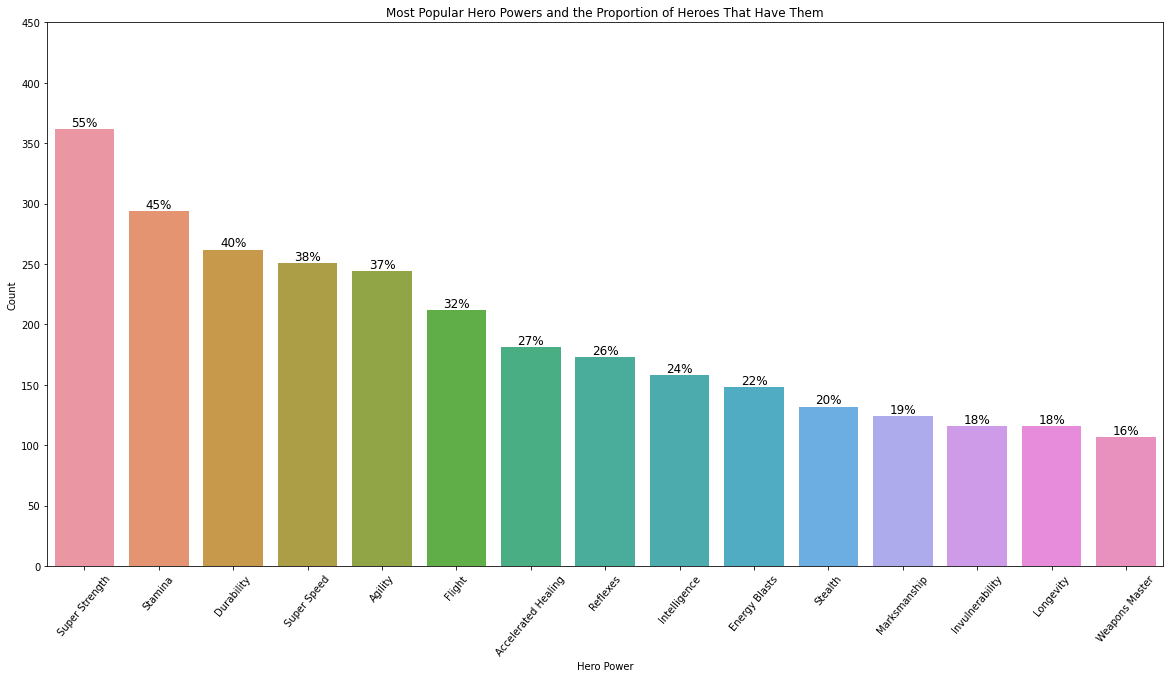

In [55]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
sns.barplot(x='Hero Power',y='Count', data=hero_powers_count.head(15))

total =float(len(combined))
ax = plt.gca()
y_max = combined['Publisher'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '{:.0%}'.format(patch.get_height()/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Most Popular Hero Powers and the Proportion of Heroes That Have Them')
plt.show()